In [125]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


# modeling 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [126]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Univariate analysis (before data cleaning)

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

### Data cleaning 

In [128]:
train.drop(['Unnamed: 0','id','lat','long'],axis=1,inplace = True)
test.drop(['Unnamed: 0','id','lat','long'],axis=1,inplace = True)

In [129]:
train.drop(['posting_date'],axis=1,inplace = True)
test.drop(['posting_date'],axis=1,inplace = True)

In [130]:
train.isna().sum()

year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
price                0
dtype: int64

In [131]:
# impute null values using eterative imputer 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# import estimator as BayesianRidge 
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')


In [132]:
train.head(2)

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,7995
1,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,14999


In [133]:
# splitting the data into categorical and numerical columns 
num_columns =['year','odometer']
cat_columns = ['size','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','state']

In [134]:
# change Year column to represent int type 
train.year = train.year.astype('int64')
test.year = test.year.astype('int64')

In [135]:
# create function to encode data using label encoding becasue iterative methode runs with 
# numerical values only 

sample = train.copy()
encoder = LabelEncoder()


def encod(column):
    n_nulls = pd.notnull(column)
    encoded_column = encoder.fit_transform(column[n_nulls])
    column.loc[n_nulls] = encoded_column
    return column

for col in cat_columns:
    sample[col] = encod(sample[col])

In [136]:
sample.head()

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,2007,18,15798,0,NaN,2,214740.0,0,0,2,NaN,9,0,10,7995
1,2008,6,10830,NaN,NaN,2,170276.0,0,0,NaN,NaN,0,0,47,14999
2,2003,23,10786,NaN,NaN,2,176910.0,0,0,1,NaN,9,NaN,27,5995
3,2017,4,2061,0,NaN,2,41000.0,0,0,0,NaN,0,NaN,4,0
4,2008,38,18455,2,5,2,138900.0,0,0,0,1,0,9,38,7995


Great that works !!!!!!!!!


now we will impute train and test data with iterateve imputer 

In [137]:
imputer = IterativeImputer(estimator=BayesianRidge())
train_cat = train[cat_columns]
test_cat = test[cat_columns]

In [138]:
test

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2018,honda,civic,NaN,4 cylinders,gas,28898.0,clean,automatic,fwd,NaN,sedan,NaN,or
1,2017,cadillac,cts 2.0 luxury sedan 4d,good,NaN,gas,41147.0,clean,other,NaN,NaN,sedan,red,fl
2,2006,toyota,sienna,excellent,6 cylinders,gas,165500.0,clean,automatic,NaN,NaN,mini-van,grey,tx
3,2016,mitsubishi,outlander sel sport,good,NaN,other,29430.0,clean,other,NaN,NaN,SUV,white,wi
4,2017,audi,a6 3.0t premium plus sedan,good,6 cylinders,gas,24238.0,clean,automatic,NaN,NaN,sedan,white,pa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124336,2015,ram,3500,excellent,6 cylinders,diesel,123000.0,clean,automatic,rwd,NaN,NaN,white,mt
124337,2007,nissan,murano.awd,NaN,NaN,gas,150000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,tx
124338,2015,dodge,dart sxt,excellent,4 cylinders,gas,90430.0,clean,automatic,fwd,NaN,NaN,white,oh
124339,2001,chevrolet,2500,NaN,NaN,gas,137000.0,clean,automatic,NaN,NaN,NaN,NaN,ny


In [139]:
for col in cat_columns:
    encod(train_cat[col])
    imputed_data = imputer.fit_transform(train_cat[col].values.reshape(-1,1))
    imputed_data = imputed_data.astype('int64')
    imputed_data = pd.DataFrame(imputed_data)
    imputed_data = encoder.inverse_transform(imputed_data.values.reshape(-1,1))
    train_cat[col] = imputed_data
train[cat_columns]= train_cat

In [140]:
for col in cat_columns:
    encod(test_cat[col])
    imputed_data = imputer.fit_transform(test_cat[col].values.reshape(-1,1))
    imputed_data = imputed_data.astype('int64')
    imputed_data = pd.DataFrame(imputed_data)
    imputed_data = encoder.inverse_transform(imputed_data.values.reshape(-1,1))
    test_cat[col] = imputed_data
test[cat_columns]= test_cat

In [141]:
train.to_csv('final_train.csv',index=False)
test.to_csv('final_test.csv',index = False)

### Prepare for modelling 

In [142]:
train.drop(['model','condition','cylinders','title_status','drive','size','type',
           'paint_color','state'],axis=1,inplace=True)

test.drop(['model','condition','cylinders','title_status','drive','size','type',
           'paint_color','state'],axis=1,inplace=True)

In [145]:
columns_dict ={'manufacturer':'Car_Name','year':'Year',
              'odometer':'Kms_Driven','fuel':'Fuel_type','transmission':'Transmission'}

In [146]:
train.rename(columns=columns_dict, inplace=True)
test.rename(columns = columns_dict,inplace=True)

In [147]:
train.to_csv('model_train.csv',index=False)
test.to_csv('model_test.csv',index = False)

In [148]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [149]:
car_data = pd.read_csv('model_train.csv')

car_data.head()



,Year,Car_Name,Fuel_type,Kms_Driven,Transmission,price
0,2007,infiniti,gas,214740.0,automatic,7995
1,2008,cadillac,gas,170276.0,automatic,14999
2,2003,lexus,gas,176910.0,automatic,5995
3,2017,bmw,gas,41000.0,automatic,0
4,2008,toyota,gas,138900.0,automatic,7995


In [150]:
car_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          290129 non-null  int64  
 1   Car_Name      290129 non-null  object 
 2   Fuel_type     290129 non-null  object 
 3   Kms_Driven    290129 non-null  float64
 4   Transmission  290129 non-null  object 
 5   price         290129 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.3+ MB


In [151]:
car_data.isnull().sum()

car_data.describe()
car_data.columns


Index(['Year', 'Car_Name', 'Fuel_type', 'Kms_Driven', 'Transmission', 'price'], dtype='object')

In [152]:
print(car_data['Fuel_type'].value_counts())

print(car_data['Transmission'].value_counts())
fuel_type = car_data['Fuel_type']
transmission_type = car_data['Transmission']
selling_price = car_data['price']




gas         244146
other        20904
diesel       20309
hybrid        3607
electric      1163
Name: Fuel_type, dtype: int64
automatic    229671
other         43686
manual        16772
Name: Transmission, dtype: int64


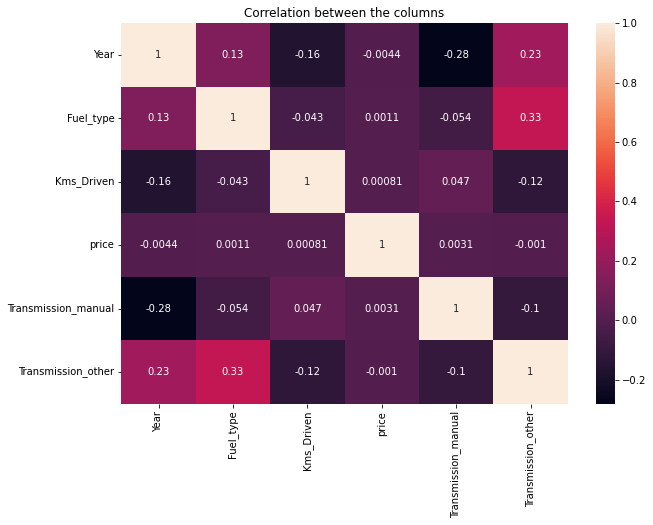

In [153]:

#manual encoding
car_data.replace({'Fuel_type':{'gas':0, 'diesel':1, 'hybrid':2,'electric':3,'other':4}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=[ 'Transmission'], drop_first=True)

plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()



In [154]:

X = car_data.drop(['Car_Name','price'], axis=1)
y = car_data['price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)



Shape of X is:  (290129, 5)
Shape of y is:  (290129,)
X_test shape: (87039, 5)
X_train shape: (203090, 5)
y_test shape:  (87039,)
y_train shape: (203090,)


MAE:  99794.68369533839
MSE:  200966792661503.78
R2 score:  -570538.755303893


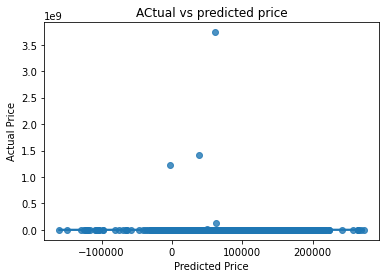

In [155]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [157]:
test = pd.read_csv('model_test.csv')

In [158]:
test.replace({'Fuel_type':{'gas':0, 'diesel':1, 'hybrid':2,'electric':3,'other':4}}, inplace=True)
#one hot encoding
test = pd.get_dummies(test, columns=[ 'Transmission'], drop_first=True)

In [159]:
test.drop(['Car_Name'],axis=1,inplace=True)

In [160]:
test = scaler.transform(test)

In [161]:
target = model.predict(test)

In [162]:
id_test = pd.read_csv('test.csv')
id_test = id_test['id']

In [163]:
submission = pd.DataFrame({'id':id_test,'Target':target},columns=['id','Target'])

In [164]:
submission.to_csv('submit.csv',index=False)